# Cinemática de Mecanismos
## Professor Paulo Victor

Obtenha a velocidade do pistão para o instante de tempo $t=5s$. Considere: \\ $$\theta = 0,5t rad$$ $$\dot{\theta} = 0.5 rad/s$$ $$L_a = 0,3m$$  $$L_b = 0,7m$$

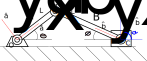

In [4]:
from IPython.core.display import SVG
SVG(filename="biela-manivela.svg")

In [1]:
import sympy as sy
import sympy.physics.mechanics as me

In [2]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

In [3]:
theta,phi = me.dynamicsymbols('theta phi')

In [4]:
la,lb = sy.symbols('la lb')

In [5]:
A.orient(N,'Axis',[theta,N.z])
B.orient(N,'Axis',[sy.pi/2-phi,N.z])

In [6]:
O = me.Point('O')
O.set_vel(N,0)

In [7]:
Q = me.Point('Q')
Q.set_pos(O,la*A.x)
Q.v2pt_theory(O,N,A)

la*theta'*A.y

In [8]:
C = me.Point('C')
C.set_pos(O, la*A.x - lb*B.y)
C.set_vel(N,(la*A.x - lb*B.y).dt(N))
C.vel(N)

la*theta'*A.y - lb*phi'*B.x

In [9]:
EqRC = C.vel(N).express(N).args[0][0][1]
EqRC

la*cos(theta(t))*Derivative(theta(t), t) - lb*cos(phi(t))*Derivative(phi(t), t)

In [10]:
t = me.dynamicsymbols._t
#phid,thetad = me.dynamicsymbols('phi,theta',1) <- outra maneira de fazer

In [11]:
phi_ponto = sy.diff(phi,t)
sol_phi_ponto = sy.solve(EqRC,phi_ponto)[0]
#Sol1 = sy.solve(EqRC,phid)[0] <- outra maneira de fazer
sol_phi_ponto

la*cos(theta(t))*Derivative(theta(t), t)/(lb*cos(phi(t)))

In [12]:
EqRC_Int = sy.integrate(EqRC,t)
EqRC_Int

la*sin(theta(t)) - lb*sin(phi(t))

In [13]:
sol_phi = sy.solve(EqRC_Int,phi)[0]
sol_phi

pi - asin(la*sin(theta(t))/lb)

In [14]:
v = C.vel(N).express(N).args[0][0][0]
v

-la*sin(theta(t))*Derivative(theta(t), t) - lb*sin(phi(t))*Derivative(phi(t), t)

In [15]:
vsubs = v.subs(phi_ponto,sol_phi_ponto).subs(phi,sol_phi)
vsubs

la**2*sin(theta(t))*cos(theta(t))*Derivative(theta(t), t)/(lb*sqrt(-la**2*sin(theta(t))**2/lb**2 + 1)) - la*sin(theta(t))*Derivative(theta(t), t)

In [16]:
theta_ponto = sy.diff(theta,t)
tn = 5
dic = {theta:0.5*tn, theta_ponto:0.5, la:0.3, lb:0.7}

In [17]:
vnum = vsubs.subs(dic)
vnum

-0.121660169213847

Podemos ir um pouco além...

In [18]:
import numpy as np

In [19]:
tnn = np.linspace(0,20,200)

In [20]:
V = np.zeros(200)

In [25]:
for i in range(0,200):
    V[i] = vsubs.subs({theta:0.5*tnn[i], theta_ponto:0.5, la:0.3, lb:0.7})

In [27]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Velocidade do pistão')

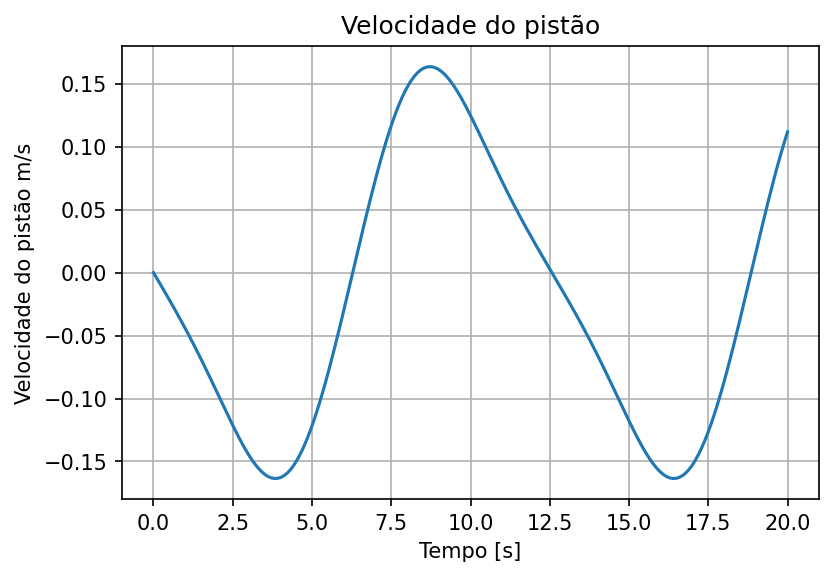

In [38]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(tnn, V)
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade do pistão m/s')
plt.grid(True)
plt.title('Velocidade do pistão')